# idr0001: Sysgro
<a href="https://idr.openmicroscopy.org/webclient/?show=screen-3">Sysgro screen</a>
<table><tr>
<td>A quick look at one of the studies in the IDR, Sysgro.</td>
<td><img src="https://idr.openmicroscopy.org/webclient/render_image/1230601/6/0/?c=1|50:300$00FF00,2|100:800$0000FF&m=c&p=normal&ia=0&q=0.9" width="200px"/></td>
<td><img src="https://idr.openmicroscopy.org/webclient/render_image/1232528/6/0/?c=1|50:300$00FF00,2|100:800$0000FF&m=c&p=normal&ia=0&q=0.9" width="200px"/></td>
<td><img src="https://idr.openmicroscopy.org/webclient/render_image/1275942/6/0/?c=1|50:300$00FF00,2|100:800$0000FF&m=c&p=normal&ia=0&q=0.9" width="200px"/></td>
</tr></table>

### Dependencies
 * [Matplotlib](https://matplotlib.org/)
 * [NumPy](https://www.numpy.org/)

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import omero
from omero.gateway import BlitzGateway
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)


In [2]:
screen = "idr0001-graml-sysgro/screenA"

### Connect to IDR

In [12]:
HOST = 'ws://idr.openmicroscopy.org/omero-ws'
conn = BlitzGateway('public', 'public',
                    host=HOST, secure=True)
print(conn.connect())
conn.c.enableKeepAlive(60)

### Load information about Sysgro

In [3]:
idr0001 = [x for x in conn.listScreens(2) if x.name == screen][0]

In [4]:
idr0001.name

u'idr0001-graml-sysgro/screenA'

In [5]:
print(idr0001.description)

Publication Title
A Genomic Multiprocess Survey of Machineries that Control and Link Cell Shape, Microtubule Organization, and Cell-Cycle Progression

Screen Description
Primary screen of fission yeast knock out mutants looking for genes controlling cell shape, microtubules, and cell-cycle progression. 262 genes controlling specific aspects of those processes are identifed, validated, and functionally annotated.


In [11]:
for ann in idr0001.listAnnotations():
    if ann.OMERO_TYPE == omero.model.MapAnnotationI:
        annotations = dict(ann.getValue())
print("""
  PubMed ID: %(PubMed ID)s
  Authors: %(Publication Authors)s
  Imaging Method: %(Imaging Method)s
""" % annotations)


  PubMed ID: 25373780 http://www.ncbi.nlm.nih.gov/pubmed/25373780
  Authors: Graml V, Studera X, Lawson JL, Chessel A, Geymonat M, Bortfeld-Miller M, Walter T, Wagstaff L, Piddini E, Carazo-Salas RE.
  Imaging Method: spinning disk confocal microscopy



In [7]:
plates = 0
images = 0
for plate in idr0001.listChildren():
    plates += 1
    for well in plate.listChildren():
        images += len(list(well.listChildren()))
print("Plates:", plates)
print("Images:", images)

Plates: 192
Images: 109728


In [8]:
total = None
for plate in idr0001.listChildren():
    grid = plate.getWellGrid()
    single = np.zeros((len(grid), len(grid[0])))
    if total is None:
        total = np.zeros((len(grid), len(grid[0])))
    for x, row in enumerate(grid):
        for y, col in enumerate(row):
            single[x][y] = grid[x][y].getImage().getROICount()
    total += single
    break  # Continue to tally all ROIs

### Disconnect when done loading data

In [13]:
conn.close()

### Display results

<IPython.core.display.Javascript object>


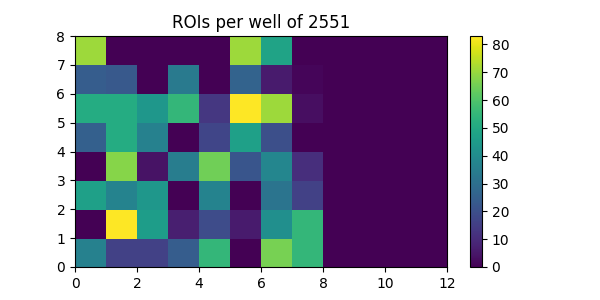

In [14]:
plt.title('ROIs per well of %s' % plate.id)
plt.pcolor(total)
plt.colorbar()
plt.show()

### License
Copyright (C) 2016-2020 University of Dundee. All Rights Reserved.
This program is free software; you can redistribute it and/or modify it
under the terms of the GNU General Public License as published by the
Free Software Foundation; either version 2 of the License, or
(at your option) any later version.
This program is distributed in the hope that it will be useful, but
WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY
or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for
more details. You should have received a copy of the GNU General
Public License along with this program; if not, write to the
Free Software Foundation,
Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301 USA.